# Remote Work and Mental Health:
Contributors: Lorelei Legg, Erika Dorsainvil and Patrick Feeney


How do the number of hours worked per week and regional differences impact employee productivity in remote work environments in North America vs. Asia?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
#create df with csv file
df = pd.read_csv('../resources/Impact_of_Remote_Work_on_Mental_Health.csv')
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [3]:
# Create North America Data set,  df by region
North_AmericaDF = df[df["Region"] == 'North America']  
North_AmericaDF.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America
13,EMP0014,51,Non-binary,Designer,Manufacturing,5,Hybrid,45,13,1,Low,Anxiety,No,Decrease,2,Satisfied,5,Weekly,Poor,North America


In [4]:
# Create Asian Data set, filtered df by region
AsiaDF = df[df["Region"] == 'Asia']  #
AsiaDF.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
23,EMP0024,53,Non-binary,Marketing,Consulting,11,Onsite,22,12,5,Low,Depression,No,No Change,2,Neutral,3,Weekly,Poor,Asia
30,EMP0031,22,Female,Data Scientist,IT,22,Onsite,20,11,1,Low,Anxiety,Yes,No Change,5,Neutral,2,Weekly,Average,Asia
36,EMP0037,48,Male,Sales,Finance,10,Onsite,30,12,1,Low,Depression,Yes,Decrease,5,Satisfied,3,NaN,Poor,Asia


## Analyze North America:

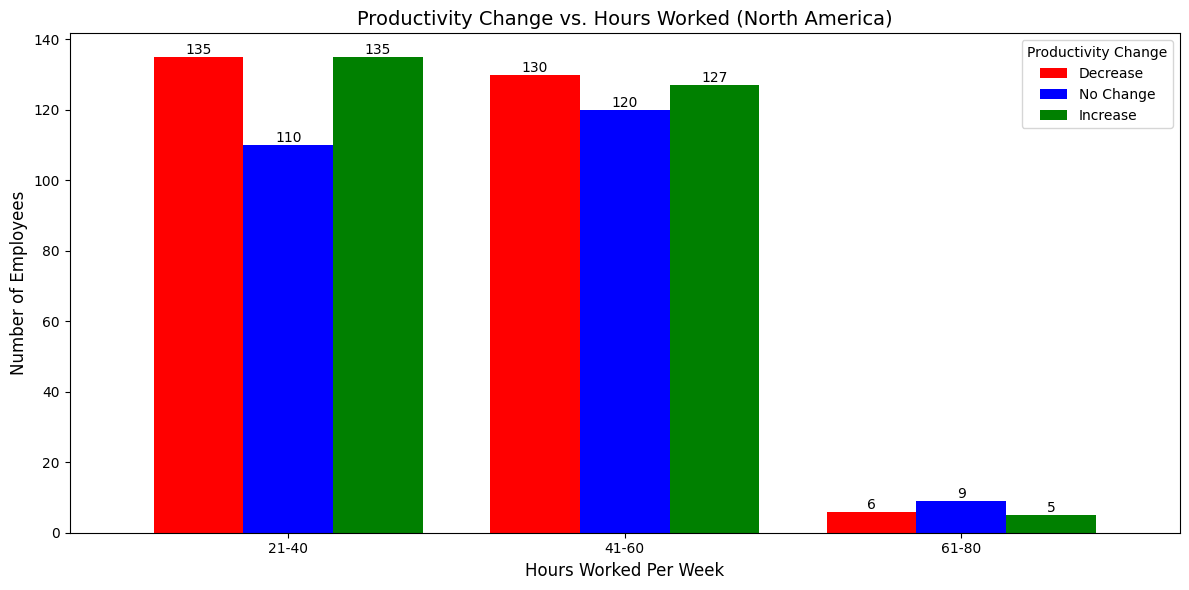

In [5]:
# Filter for North America
North_AmericaDF = df[df['Region'] == 'North America'].copy()
# Bin hours worked into ranges
bins = [0, 20, 40, 60, 80]
bin_labels = ['0-20', '21-40', '41-60', '61-80']
North_AmericaDF['Hours_Worked_Bins'] = pd.cut(
    North_AmericaDF['Hours_Worked_Per_Week'], bins=bins, labels=bin_labels, right=False
)
# Group data by hours worked bns and productivity change
grouped_data = North_AmericaDF.groupby(['Hours_Worked_Bins', 'Productivity_Change'], observed=True).size().unstack(fill_value=0)
# Plot a binned bar chart
bars1 =grouped_data.plot(kind='bar', figsize=(12, 6), width=0.8, color=['red', 'blue', 'green'])
# Customize the chart
plt.title("Productivity Change vs. Hours Worked (North America)", fontsize=14)
plt.xlabel("Hours Worked Per Week", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
for bar in bars1.patches:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.legend(title="Productivity Change", labels=['Decrease', 'No Change', 'Increase'])
# Show the plot
plt.tight_layout()
plt.savefig("ProductivityChange_vs_HoursWorked_NorthAmerica.png")
plt.show()


In [6]:
RemoteNADF = North_AmericaDF[North_AmericaDF["Work_Location"] == 'Remote'] # create and show the remote dataset
RemoteNADF.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,...,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Hours_Worked_Bins
24,EMP0025,56,Male,Sales,Finance,6,Remote,54,15,3,...,Burnout,No,Increase,2,Neutral,4,Daily,Average,North America,41-60
29,EMP0030,59,Male,Software Engineer,Healthcare,34,Remote,25,15,2,...,Depression,Yes,No Change,3,Satisfied,1,Weekly,Poor,North America,21-40
32,EMP0033,45,Prefer not to say,Project Manager,Manufacturing,29,Remote,20,14,2,...,Anxiety,Yes,Decrease,5,Satisfied,5,Daily,Good,North America,21-40
33,EMP0034,48,Male,Software Engineer,Healthcare,27,Remote,26,9,3,...,Anxiety,Yes,No Change,5,Neutral,4,Daily,Average,North America,21-40
45,EMP0046,32,Male,Marketing,Retail,24,Remote,42,8,2,...,Burnout,No,No Change,2,Neutral,3,Daily,Poor,North America,41-60


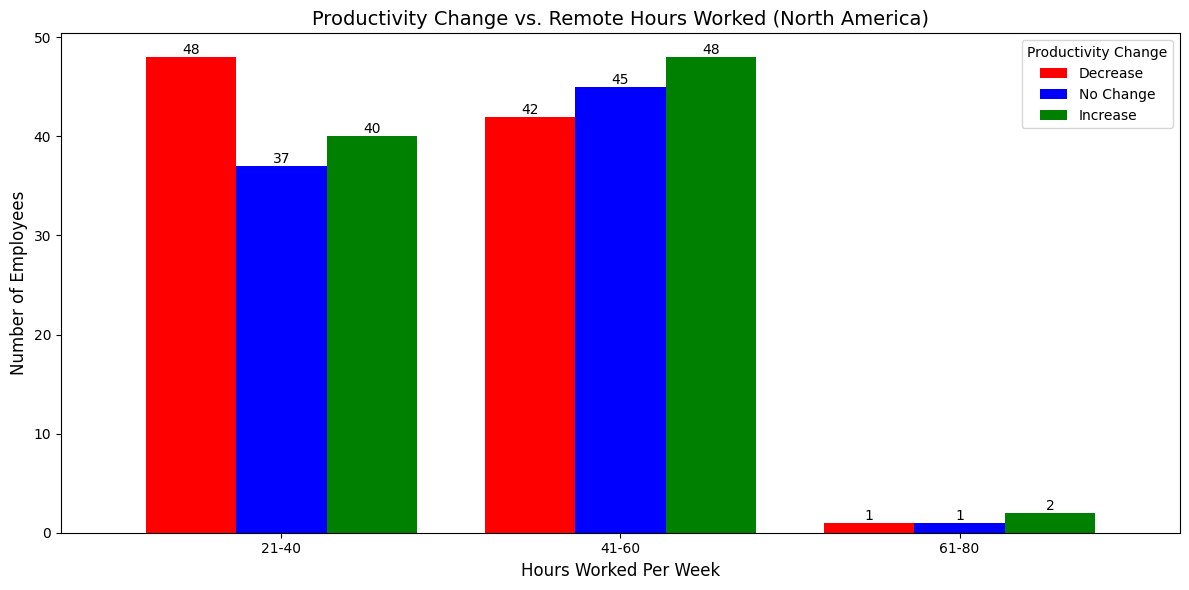

In [7]:
RemoteNADF = North_AmericaDF[North_AmericaDF["Work_Location"] == 'Remote'].copy()
# Bin hours worked into ranges
bins = [0, 20, 40, 60, 80]
bin_labels = ['0-20', '21-40', '41-60', '61-80']
RemoteNADF['Hours_Worked_Bins'] = pd.cut(
    RemoteNADF['Hours_Worked_Per_Week'], bins=bins, labels=bin_labels, right=False
)
# Group data by hours worked bins and productivity change
grouped_data = RemoteNADF.groupby(['Hours_Worked_Bins', 'Productivity_Change'], observed=True).size().unstack(fill_value=0)
# Plot a binned bar chart
bars2 = grouped_data.plot(kind='bar', figsize=(12, 6), width=0.8, color=['red', 'blue', 'green'])
# Customize the chart
plt.title("Productivity Change vs. Remote Hours Worked (North America)", fontsize=14)
plt.xlabel("Hours Worked Per Week", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
for bar in bars2.patches:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')  # Add text annotation
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.legend(title="Productivity Change", labels=['Decrease', 'No Change', 'Increase'])
plt.tight_layout()
plt.savefig("ProductivityChange_vs_RemoteHoursWorked_NorthAmerica.png")
plt.show()

# North America Remote Analysis:
The analysis shows that in North America employees who report working between 21-40 remote hours per week report the highest level of productivity decrease. The employees who reported working 41-60 hours per week reported the highest levels of increased productivity out of the three bins. Noteably most North Americans in the data set work between 41-60 hours per week.The sample size for the employees that worked between 61-80 hours a week in North America is small and therefore does not provide clear conclusions.



## Analyze Asia:

In [8]:
AsiaDF = df[df['Region'] == 'Asia'] # show Asia dataframe
AsiaDF.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
23,EMP0024,53,Non-binary,Marketing,Consulting,11,Onsite,22,12,5,Low,Depression,No,No Change,2,Neutral,3,Weekly,Poor,Asia
30,EMP0031,22,Female,Data Scientist,IT,22,Onsite,20,11,1,Low,Anxiety,Yes,No Change,5,Neutral,2,Weekly,Average,Asia
36,EMP0037,48,Male,Sales,Finance,10,Onsite,30,12,1,Low,Depression,Yes,Decrease,5,Satisfied,3,NaN,Poor,Asia


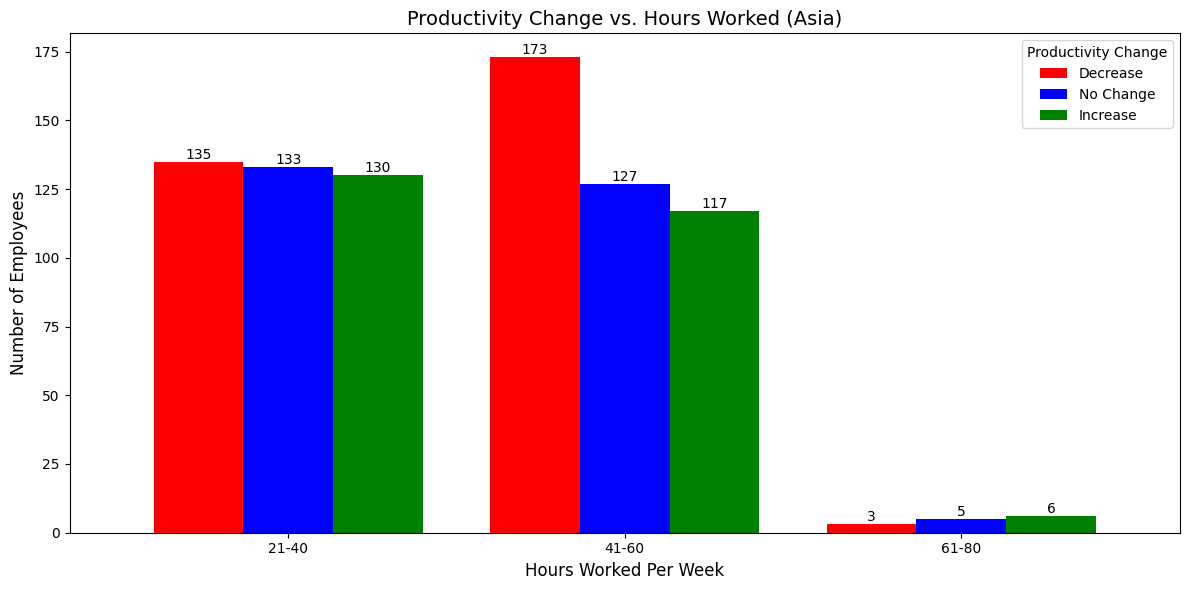

In [9]:
# make a copy for Asia df
AsiaDF = df[df['Region'] == 'Asia'].copy()
# Bin hours worked into ranges
bins = [0, 20, 40, 60, 80]
bin_labels = ['0-20', '21-40', '41-60', '61-80']
AsiaDF['Hours_Worked_Bins'] = pd.cut(
    AsiaDF['Hours_Worked_Per_Week'], bins=bins, labels=bin_labels, right=False
)
# Group data by hours worked bins and productivity change
grouped_data = AsiaDF.groupby(['Hours_Worked_Bins', 'Productivity_Change'], observed=True).size().unstack(fill_value=0)
# Plot a binned bar chart
bars3 = grouped_data.plot(kind='bar', figsize=(12, 6), width=0.8, color=['red', 'blue', 'green'])
# Customize the chart
plt.title("Productivity Change vs. Hours Worked (Asia)", fontsize=14)
plt.xlabel("Hours Worked Per Week", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
for bar in bars3.patches:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')  # Add text annotation
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.legend(title="Productivity Change", labels=['Decrease', 'No Change', 'Increase'])
# Show the plot
plt.tight_layout()
plt.savefig("ProductivityChange_vs_HoursWorked_Asia.png")
plt.show()

In [10]:
RemoteAsiaDF = AsiaDF[AsiaDF["Work_Location"] == 'Remote'] # create and show remote Asia DF
RemoteAsiaDF.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,...,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Hours_Worked_Bins
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,...,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia,41-60
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,...,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia,41-60
37,EMP0038,31,Female,Designer,Healthcare,18,Remote,47,14,2,...,NaN,Yes,Increase,2,Satisfied,5,Daily,Good,Asia,41-60
56,EMP0057,42,Male,Software Engineer,IT,14,Remote,48,13,5,...,Depression,Yes,Increase,4,Neutral,5,NaN,Good,Asia,41-60
95,EMP0096,44,Female,Project Manager,Manufacturing,2,Remote,54,8,5,...,Burnout,No,Decrease,1,Satisfied,3,NaN,Good,Asia,41-60


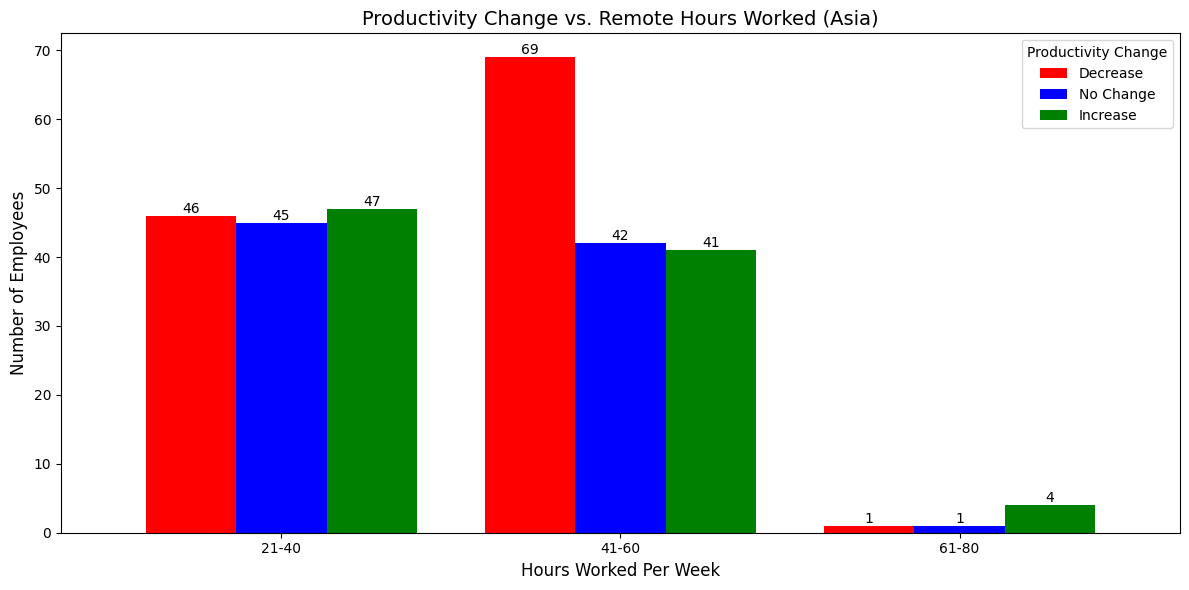

In [11]:
# copy remote asia df
RemoteAsiaDF = AsiaDF[AsiaDF["Work_Location"] == 'Remote'].copy()
# Bin hours worked into ranges
bins = [0, 20, 40, 60, 80]
bin_labels = ['0-20', '21-40', '41-60', '61-80']
RemoteAsiaDF['Hours_Worked_Bins'] = pd.cut(
    RemoteAsiaDF['Hours_Worked_Per_Week'], bins=bins, labels=bin_labels, right=False
)
# Group data by hours worked bins and productivity change
grouped_data = RemoteAsiaDF.groupby(['Hours_Worked_Bins', 'Productivity_Change'], observed=True).size().unstack(fill_value=0)
# Plot a binned bar chart
bars4= grouped_data.plot(kind='bar', figsize=(12, 6), width=0.8, color=['red', 'blue', 'green'])
# Customize the chart
plt.title("Productivity Change vs. Remote Hours Worked (Asia)", fontsize=14)
plt.xlabel("Hours Worked Per Week", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
for bar in bars4.patches:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')  # Add text annotation
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.legend(title="Productivity Change", labels=['Decrease', 'No Change', 'Increase'])
# Show the plot
plt.tight_layout()
plt.savefig("ProductivityChange_vs_RemoteHoursWorked_Asia.png")
plt.show()

## Asia Remote Analysis:



Key Observations:
Productivity generally trends downward as weekly hours increase beyond 40.
In Asia, the employees who reported working 21-40 reported similar levels of productivity
Most Asian employees report decrease or no productivity gains when working over 41 hours per week, underscoring potential burnout or inefficiency at higher workloads.
The small sample size for employees working 61-80 hours makes it difficult to draw conclusions for this segment.

Recommendation:
Organizations should consider monitoring and limiting work hours to optimize productivity and employee well-being.

## Regional Comparison:
The bar charts analyzing Productivity Change versus Remote Hours Worked Per Week for North America and Asia reveal distinct regional trends. In North America, productivity changes are relatively balanced across the 21-40 and 41-60 hour bins, with many employees reporting "No Change" or an "Increase" in productivity. In contrast, Asia shows a greater occurrence of "Decrease" in productivity within these same hour ranges, indicating potential challenges associated with longer working hours in remote settings.


Both regions have minimal representation in the 61-80 hour bin, suggesting that few employees work extensive hours. Despite this, productivity outcomes in this category vary significantly. North America shows more stable and positive productivity trends, while Asia has more variation and challenges. This could be due to differences in culture, workplace practices, or resources. These results suggest the importance of creating remote work policies and support systems that are tailored to the unique needs of each region.
